In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"preetham20","key":"dea4ffdceb9a389f71b89230c5100bb9"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d xiaojiu1414/cub-200-2011


!mkdir -p cub_dataset
!unzip -q cub-200-2011.zip -d cub_dataset

Dataset URL: https://www.kaggle.com/datasets/xiaojiu1414/cub-200-2011
License(s): unknown
 98% 1.05G/1.07G [00:07<00:00, 183MB/s]
100% 1.07G/1.07G [00:07<00:00, 150MB/s]


In [ ]:
import os


dataset_path = "/content/cub_dataset/CUB_200_2011.tgz"
extract_path = "/content/cub_dataset"


os.makedirs(extract_path, exist_ok=True)


!tar -xvzf {dataset_path} -C {extract_path} --strip-components=1


Streaming output truncated to the last 5000 lines.
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0050_111087.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0079_113288.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0004_111989.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0068_113247.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0127_111935.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0094_112773.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0028_113217.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0126_110959.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0007_111029.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0096_111519.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0120_113001.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0010_112678.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0025_111669.jpg
CUB_200_2011/images/118.House_Sparrow/House_Sparrow_0084_111300.j

In [ ]:

import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = "/content/cub_dataset/images"
image_size = (224, 224)

datagen = ImageDataGenerator(validation_split=0.2, rescale=1./255)
train_generator = datagen.flow_from_directory(dataset_path, target_size=image_size, subset="training")
val_generator = datagen.flow_from_directory(dataset_path, target_size=image_size, subset="validation")


Found 9465 images belonging to 200 classes.
Found 2323 images belonging to 200 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


base_model = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False


model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation="softmax")
])


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss="categorical_crossentropy",
              metrics=["accuracy"])


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory("/content/cub_dataset/images", target_size=(224, 224), batch_size=32, class_mode="categorical")


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


history = model.fit(train_generator, validation_data=val_generator, epochs=30, callbacks=[early_stopping, reduce_lr])


Found 11788 images belonging to 200 classes.
Epoch 1/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 257s 477ms/step - accuracy: 0.0467 - loss: 4.9196 - val_accuracy: 0.0904 - val_loss: 4.9832 - learning_rate: 5.0000e-04
Epoch 2/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 161s 435ms/step - accuracy: 0.2624 - loss: 2.9980 - val_accuracy: 0.1098 - val_loss: 6.8864 - learning_rate: 5.0000e-04
Epoch 3/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 163s 441ms/step - accuracy: 0.4084 - loss: 2.2310 - val_accuracy: 0.1386 - val_loss: 5.7980 - learning_rate: 5.0000e-04
Epoch 4/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 161s 437ms/step - accuracy: 0.5068 - loss: 1.8136 - val_accuracy: 0.3151 - val_loss: 3.6255 - learning_rate: 5.0000e-04
Epoch 5/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 206s 448ms/step - accuracy: 0.5650 - loss: 1.5606 - val_accuracy: 0.1920 - val_loss: 7.1261 - learning_rate: 5.0000e-04
Epoch 6/30
369/369 ━━━━━━━━━━━━━━━━━━━━ 162s 440ms/step - accuracy: 0.5975 - loss: 1.4243 - val_accuracy: 0.4434 - val_loss: 2.6116 - learning_rate: 5.0000

Saving Test1.jpeg to Test1.jpeg


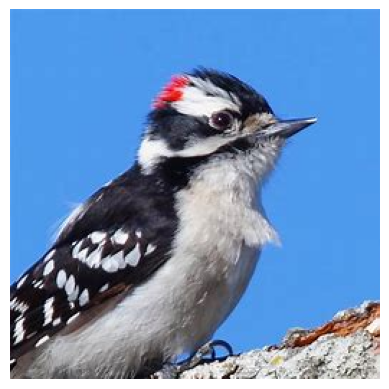

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
from google.colab import files
import matplotlib.pyplot as plt


uploaded = files.upload()


image_path = list(uploaded.keys())[0]

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)


plt.imshow(cv2.imread(image_path)[..., ::-1])
plt.axis("off")
plt.show()


In [ ]:

class_labels = train_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}

# Now, this will work
print(f"Predicted Bird Species: {class_labels[predicted_class]}")


Predicted Bird Species: 192.Downy_Woodpecker


Saving Test2.jpeg to Test2 (1).jpeg


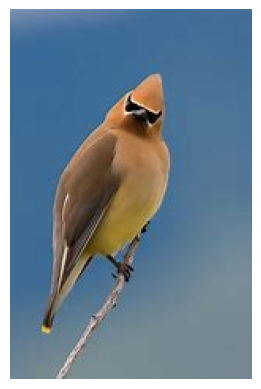

In [ ]:
uploaded = files.upload()


image_path = list(uploaded.keys())[0]


img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))
img = img / 255.0
img = np.expand_dims(img, axis=0)


plt.imshow(cv2.imread(image_path)[..., ::-1])
plt.axis("off")
plt.show()

In [ ]:
predictions = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [ ]:
predicted_class = np.argmax(predictions)


predicted_bird_name = class_labels.get(predicted_class, "Unknown Bird")

In [ ]:
print(predicted_bird_name)

186.Cedar_Waxwing


In [ ]:

model.save("bird_species_model.h5")


In [ ]:
from google.colab import files
files.download("bird_species_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import json


with open("class_labels.json", "w") as f:
    json.dump(class_labels, f)


In [ ]:
files.download("class_labels.json")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>